In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [2]:
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)

In [3]:
df = pd.DataFrame(X,columns = dataset.feature_names)
df["y"] = y
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Mit sklearn

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_normalized = sc.fit_transform(X)

pca = PCA(n_components = 30).fit(X_normalized)

In [5]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

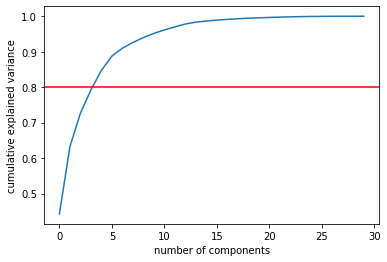

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.plot(pca.explained_variance_ratio_)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [8]:
sklearn_eigenvalues = pca.explained_variance_
sklearn_eigenvectors = pd.DataFrame(pca.components_)

In [9]:
sklearn_eigenvalues

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

In [10]:
# Ergibt nur Sinn, wenn alle Dimensionen berücksichtigt werden
sklearn_eigenvalues / sum(sklearn_eigenvalues)

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [11]:
#Eigenvektoren entlang der X-Achse
sklearn_eigenvectors

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
5,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
6,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
7,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
8,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
9,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


In [12]:
pca_X = pd.DataFrame(pca.transform(X_normalized))
pca_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


# Per Hand

In [13]:
from numpy import linalg

## 1. Schritt: Berechnen der Varianz-Kovarianz Matrix der Werte

In [14]:
# Repräsentation von Arrays in Pandas ist genau spiegelverkehrt zur Matrixschreibweise. Deswegen Transponieren
covMatrix = np.cov(X_normalized.T,bias=True)

## 2. Schritt: Berechnen der Eigenwerte und Eigenvektoren der Varianz-Kovarianz Matrix

In [15]:
# Die Eigenvektoren sind hier entlang der Y-Achse
hand_eigenvalues, hand_eigenvectors = linalg.eig(covMatrix)

## 3. Schritt: Sortieren der Eigenvektoren nach den zugehörigen Eigenwerten

In [16]:
#Einfacher zum Sortieren. Eigenvektoren sind jetzt entlang der X-Achse
hand_eigenvectors_df = pd.DataFrame(hand_eigenvectors.T)
hand_eigenvectors_df["eigenvalues"] = hand_eigenvalues

In [17]:
hand_eigenvectors_df_sorted = hand_eigenvectors_df.sort_values("eigenvalues",ascending=False)
hand_eigenvectors_df_sorted = hand_eigenvectors_df_sorted.drop("eigenvalues",axis=1)

In [18]:
# Eigenvektoren wieder entlang der Y-Achse repräsentieren
hand_eigenvectors_sorted = np.array(hand_eigenvectors_df_sorted).T

## 4. Schritt: Rotieren der Daten durch die Eigenvektoren

In [19]:
pd.DataFrame(np.matmul(X_normalized, hand_eigenvectors_sorted))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407,-0.157118,-0.877402,...,-0.096515,-0.068850,-0.084519,0.175256,-0.151020,0.201503,-0.252585,-0.033914,-0.045648,0.047169
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988,-0.711905,1.106995,...,0.077327,0.094578,0.217718,-0.011290,-0.170510,0.041129,0.181270,0.032624,0.005687,0.001868
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374,0.024066,0.454275,...,-0.311067,0.060309,0.074291,-0.102762,0.171158,-0.004735,0.049569,0.047026,-0.003146,-0.000751
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565,-1.405440,-1.116975,...,-0.434193,0.203266,0.124105,-0.153430,0.077496,0.275225,0.183462,0.042484,0.069295,0.019937
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376,-0.263805,0.377704,...,0.116545,0.017650,-0.139454,0.005332,0.003062,-0.039254,0.032168,-0.034786,-0.005038,-0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824,-2.375193,0.596130,0.035471,0.987929,0.256989,...,-0.006888,0.067000,-0.088590,-0.107898,0.219520,0.122900,0.159198,0.009853,-0.007119,0.001415
565,3.793382,-3.584048,2.088476,-2.506028,0.510723,-0.246710,0.716326,1.113360,-0.105207,-0.108632,...,0.009802,-0.019563,0.055405,-0.086135,0.001197,-0.065889,-0.068512,-0.023575,0.027486,0.010419
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991,-0.534447,0.192758,-0.341887,0.393917,0.520877,...,0.036592,-0.063352,0.200312,0.044819,0.002429,-0.007095,-0.023691,-0.002578,-0.006706,-0.003770
567,10.374794,1.672010,-1.877029,-2.356031,0.033742,0.567936,-0.223082,0.280239,-0.542035,-0.089296,...,-0.140648,0.042478,-0.168820,0.195969,0.377830,0.198192,-0.027409,-0.068086,0.084163,0.023783


In [20]:
pd.DataFrame(np.matmul(X_normalized, hand_eigenvectors_sorted[:,:5]))

,0,1,2,3,4
0,9.192837,1.948583,-1.123166,3.633731,1.195110
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775
2,5.733896,-1.075174,-0.551748,0.912083,0.177086
3,7.122953,10.275589,-3.232790,0.152547,2.960878
4,3.935302,-1.948072,1.389767,2.940639,-0.546747
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824
565,3.793382,-3.584048,2.088476,-2.506028,0.510723
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991
567,10.374794,1.672010,-1.877029,-2.356031,0.033742


In [21]:
pd.DataFrame(np.matmul(X_normalized, hand_eigenvectors_sorted)).loc[:,:4]

,0,1,2,3,4
0,9.192837,1.948583,-1.123166,3.633731,1.195110
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775
2,5.733896,-1.075174,-0.551748,0.912083,0.177086
3,7.122953,10.275589,-3.232790,0.152547,2.960878
4,3.935302,-1.948072,1.389767,2.940639,-0.546747
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824
565,3.793382,-3.584048,2.088476,-2.506028,0.510723
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991
567,10.374794,1.672010,-1.877029,-2.356031,0.033742


In [22]:
# Selbe Multiplikation findet auch bei sklearn statt
pd.DataFrame(np.matmul(X_normalized,sklearn_eigenvectors.T))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783
